In [1]:
import pandas as pd
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [2]:
neg_ner_df = pd.read_parquet('neg_ner.parquet')

In [3]:
neg_ner_df

,entities,labels
0,AI,ORG
1,AmericaInterest Successfully,ORG
2,INStream,ORG
3,Jan. 6,DATE
4,COVID,ORG
...,...,...
9401509,Newsletters Mobile,PERSON
9401510,Apps Facebook,PERSON
9401511,eNewspaper Archives,ORG
9401512,Homes Classifieds,PERSON


In [4]:
def wordcloud_plt(df):
  data = dict(zip(df['entities'].tolist(), df['counts'].tolist()))


  wordcloud_obj = wordcloud.WordCloud(
      width = 1000,
      height = 500,
      background_color = 'white',
      max_words=30,
      stopwords = wordcloud.STOPWORDS)

  wordcloud_obj.generate_from_frequencies(data)

  fig = plt.figure(
      figsize = (20, 10),
      facecolor = 'k',
      edgecolor = 'k')
  plt.imshow(wordcloud_obj, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

In [5]:
# Dictionary mapping for combining entities
combine_mapping = {
    'Musk': 'Elon Musk',
    'Biden':'Joe Biden',
    'Trump': 'Donald Trump',
    'Covid': 'COVID-19',
    'Gray Media Group, Inc.': 'Gray Media Group',
    'Captioning/Audio DescriptionA Gray Media Group': 'Gray Media Group',
    'DIGI COMMUNICATIONS N.V.': 'DIGI'
    
}

# Function to combine entities
def combine_entities(entity):
    for key, value in combine_mapping.items():
        if key.lower() in entity.lower():
            return value
    return entity


In [6]:
%%time
# Apply the function to the 'entities' column
neg_ner_df['entities'] = neg_ner_df['entities'].apply(combine_entities)

CPU times: total: 6.38 s
Wall time: 11.6 s


In [7]:
neg_ner_df.loc[neg_ner_df['entities'] == 'OpenAI', 'labels'] = neg_ner_df.loc[neg_ner_df['entities'] == 'OpenAI', 'labels'].replace('GPE', 'ORG')
neg_ner_df.loc[neg_ner_df['entities'] == 'OpenAI', 'labels'] = neg_ner_df.loc[neg_ner_df['entities'] == 'OpenAI', 'labels'].replace('PERSON', 'ORG')
neg_ner_df.loc[neg_ner_df['entities'] == 'GPT-4', 'labels'] = neg_ner_df.loc[neg_ner_df['entities'] == 'GPT-4', 'labels'].replace('PERSON', 'PRODUCT')
neg_ner_df.loc[neg_ner_df['entities'] == 'LinkedIn', 'labels'] = neg_ner_df.loc[neg_ner_df['entities'] == 'LinkedIn', 'labels'].replace('GPE', 'ORG')

In [8]:
neg_person_df = neg_ner_df[neg_ner_df['labels'] == 'PERSON']
neg_person_df

,entities,labels
5,App,PERSON
9,Jun,PERSON
15,George Floyd,PERSON
23,Putin,PERSON
29,Donald Trump,PERSON
...,...,...
9401503,Op-Ed,PERSON
9401507,Conditions Buy,PERSON
9401509,Newsletters Mobile,PERSON
9401510,Apps Facebook,PERSON


In [9]:
neg_person_counts = neg_person_df.groupby(['entities','labels'])['entities'].count().reset_index(name='counts')

In [10]:
neg_person_counts.sort_values(['counts'] , ascending=False).head(20)

,entities,labels,counts
71525,Elon Musk,PERSON,16016
113275,Joe Biden,PERSON,12642
232926,Twitter,PERSON,10855
39365,COVID-19,PERSON,8843
65770,Donald Trump,PERSON,5159
156267,Midjourney,PERSON,3355
179047,Pichai,PERSON,3041
58149,Dashboard Profile,PERSON,2876
220510,Sundar Pichai,PERSON,2693
200703,Sam Altman,PERSON,2634


### Top Person entities

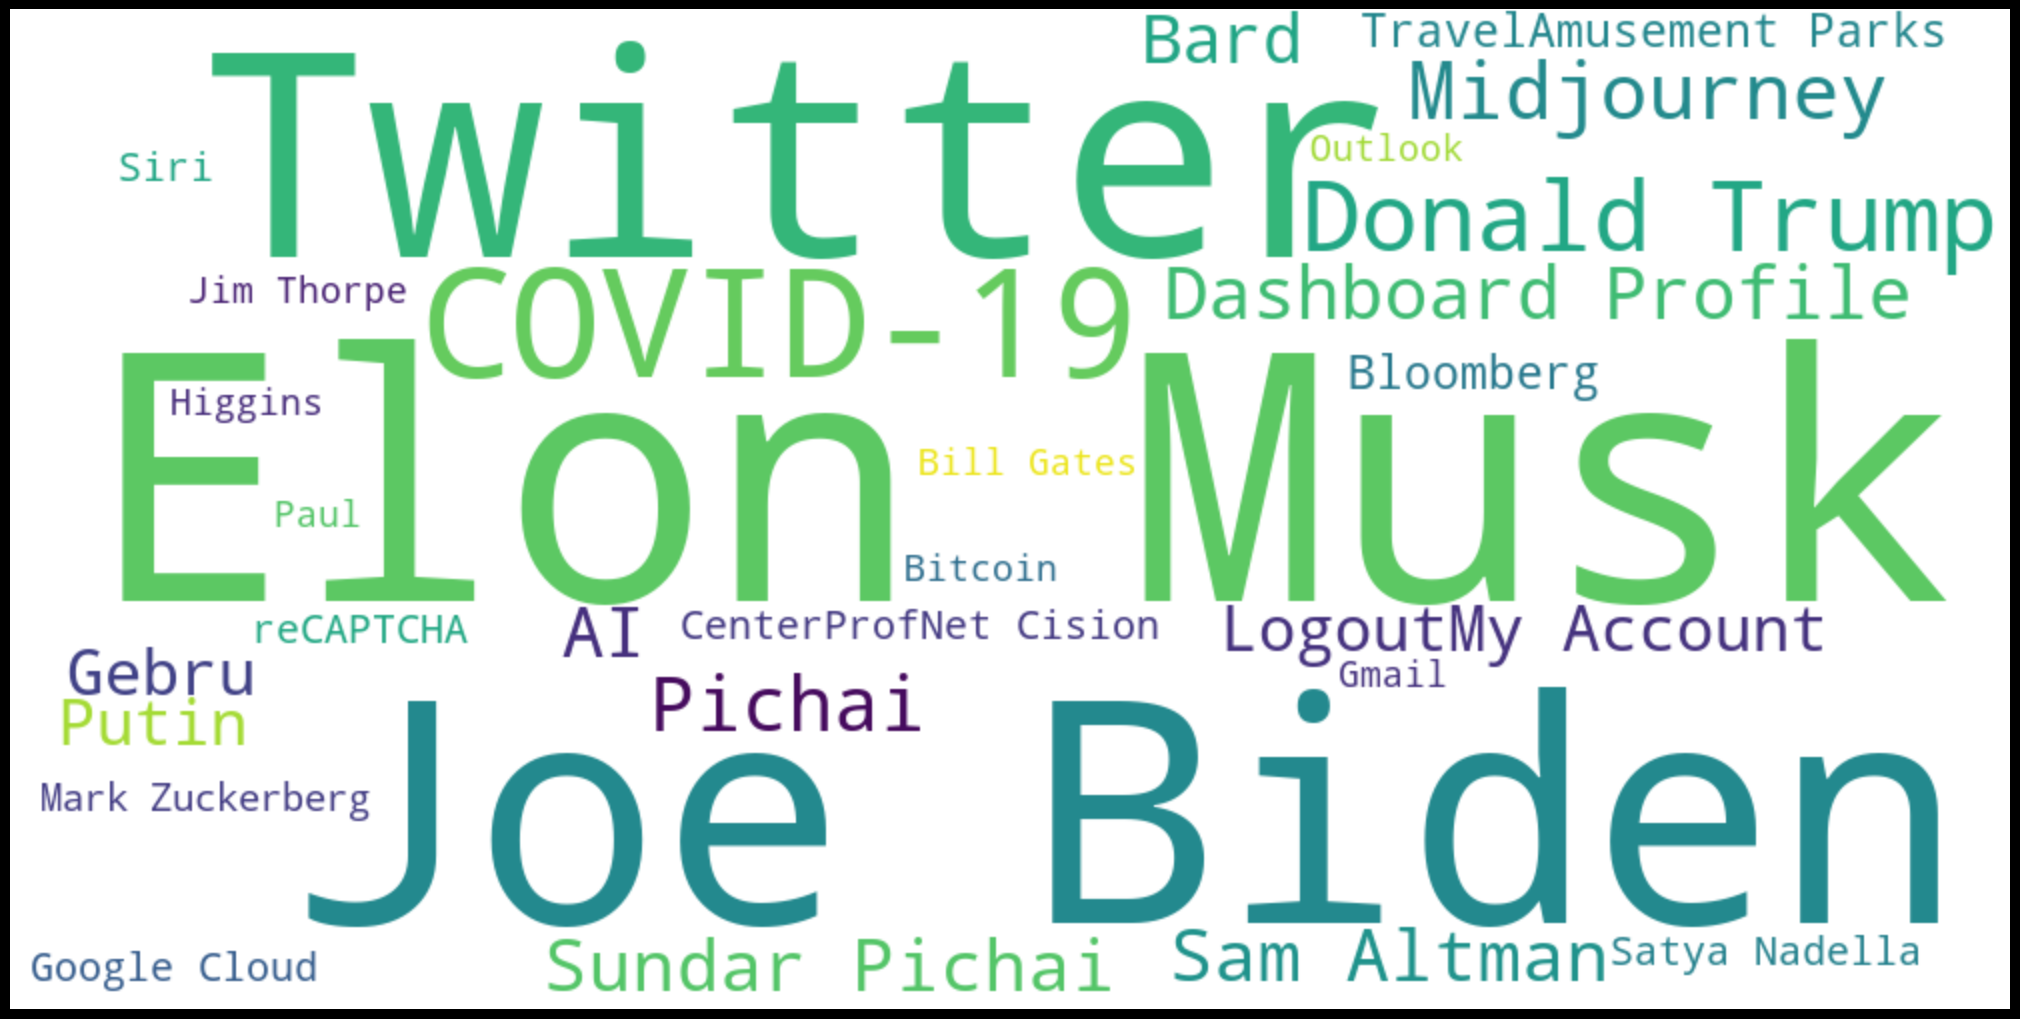

In [11]:
wordcloud_plt(neg_person_counts)

In [12]:
neg_org_df = neg_ner_df[neg_ner_df['labels'] == 'ORG']
neg_org_df

,entities,labels
0,AI,ORG
1,AmericaInterest Successfully,ORG
2,INStream,ORG
4,COVID-19,ORG
6,AI,ORG
...,...,...
9401499,Georgetown University,ORG
9401504,the Los Angeles Times,ORG
9401506,Info / Cookie,ORG
9401508,Sell Licensing & Reprints Help Center My Accou...,ORG


In [13]:
neg_org_counts = neg_org_df.groupby(['entities','labels'])['entities'].count().reset_index(name='counts')

In [14]:
neg_org_counts.sort_values(['counts'] , ascending=False).head(20)

,entities,labels,counts
9642,AI,ORG,491002
185956,Google,ORG,72060
273596,Microsoft,ORG,60512
312689,OpenAI,ORG,54453
189945,Gray Media Group,ORG,30485
86167,COVID-19,ORG,29678
121259,DIGI,ORG,23119
35715,Amazon,ORG,15904
259046,ML,ORG,14512
61579,Bard,ORG,13993


### Top Organisational entities

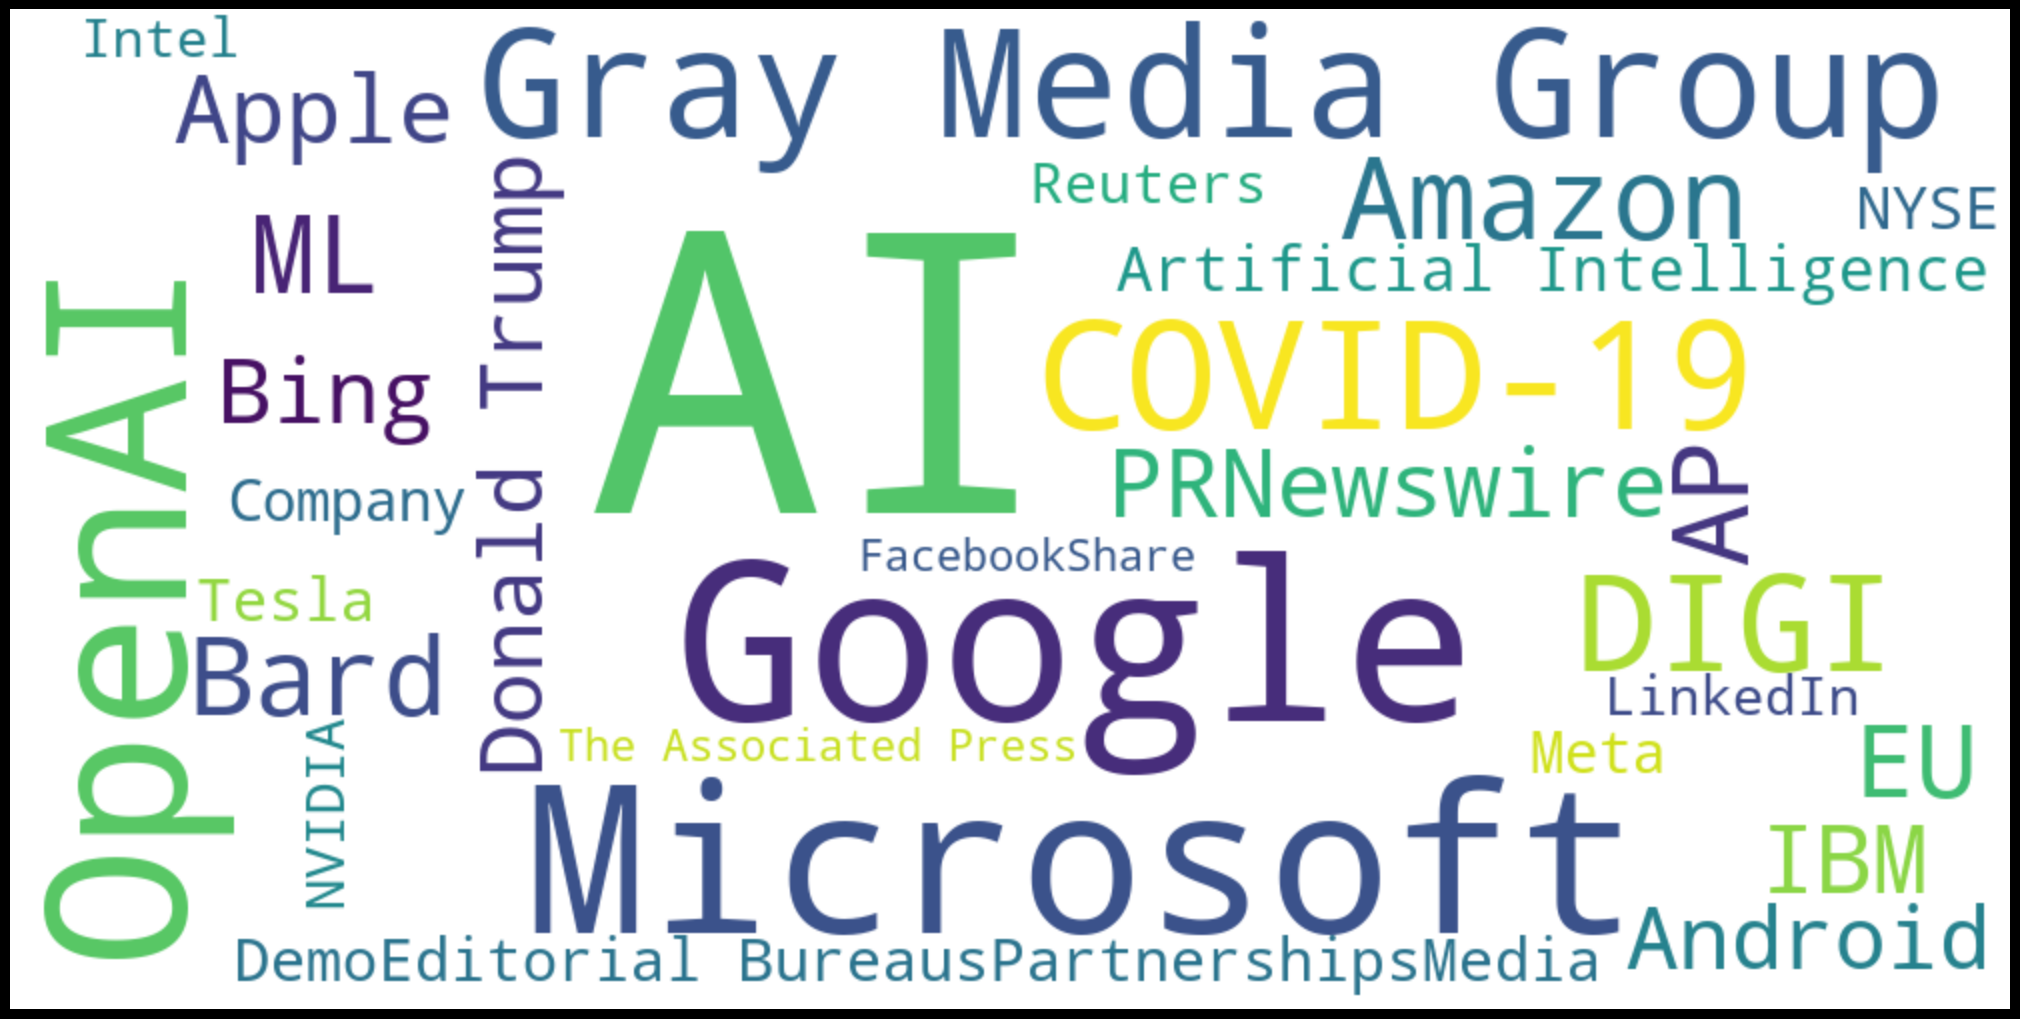

In [15]:
wordcloud_plt(neg_org_counts)

In [16]:
neg_prod_df = neg_ner_df[neg_ner_df['labels'] == 'PRODUCT']
neg_prod_df

,entities,labels
19,GameStop,PRODUCT
46,TollSuperstar,PRODUCT
85,Daytona,PRODUCT
125,SUBSCRIBE Top,PRODUCT
489,Everseen,PRODUCT
...,...,...
9400491,VideoYale,PRODUCT
9400527,I-91,PRODUCT
9400776,LivePodcasts,PRODUCT
9401308,ServicePrivacy,PRODUCT


In [17]:
neg_prod_counts = neg_prod_df.groupby(['entities','labels'])['entities'].count().reset_index(name='counts')

In [18]:
neg_prod_counts.sort_values(['counts'] , ascending=False).head(20)

,entities,labels,counts
9771,GPT-4,PRODUCT,10237
25164,Twitter,PRODUCT,9910
2317,AlertsLehigh Valley TrafficBerks,PRODUCT,2360
8386,Excel,PRODUCT,1975
11828,JavaScript,PRODUCT,1849
4528,CRM,PRODUCT,1679
7099,DeepMind,PRODUCT,1678
21413,ServicePrivacy,PRODUCT,1513
23235,Subscribe,PRODUCT,1205
17155,PersonsGood NewsWeatherForecastHour,PRODUCT,1158


### Top Product entities

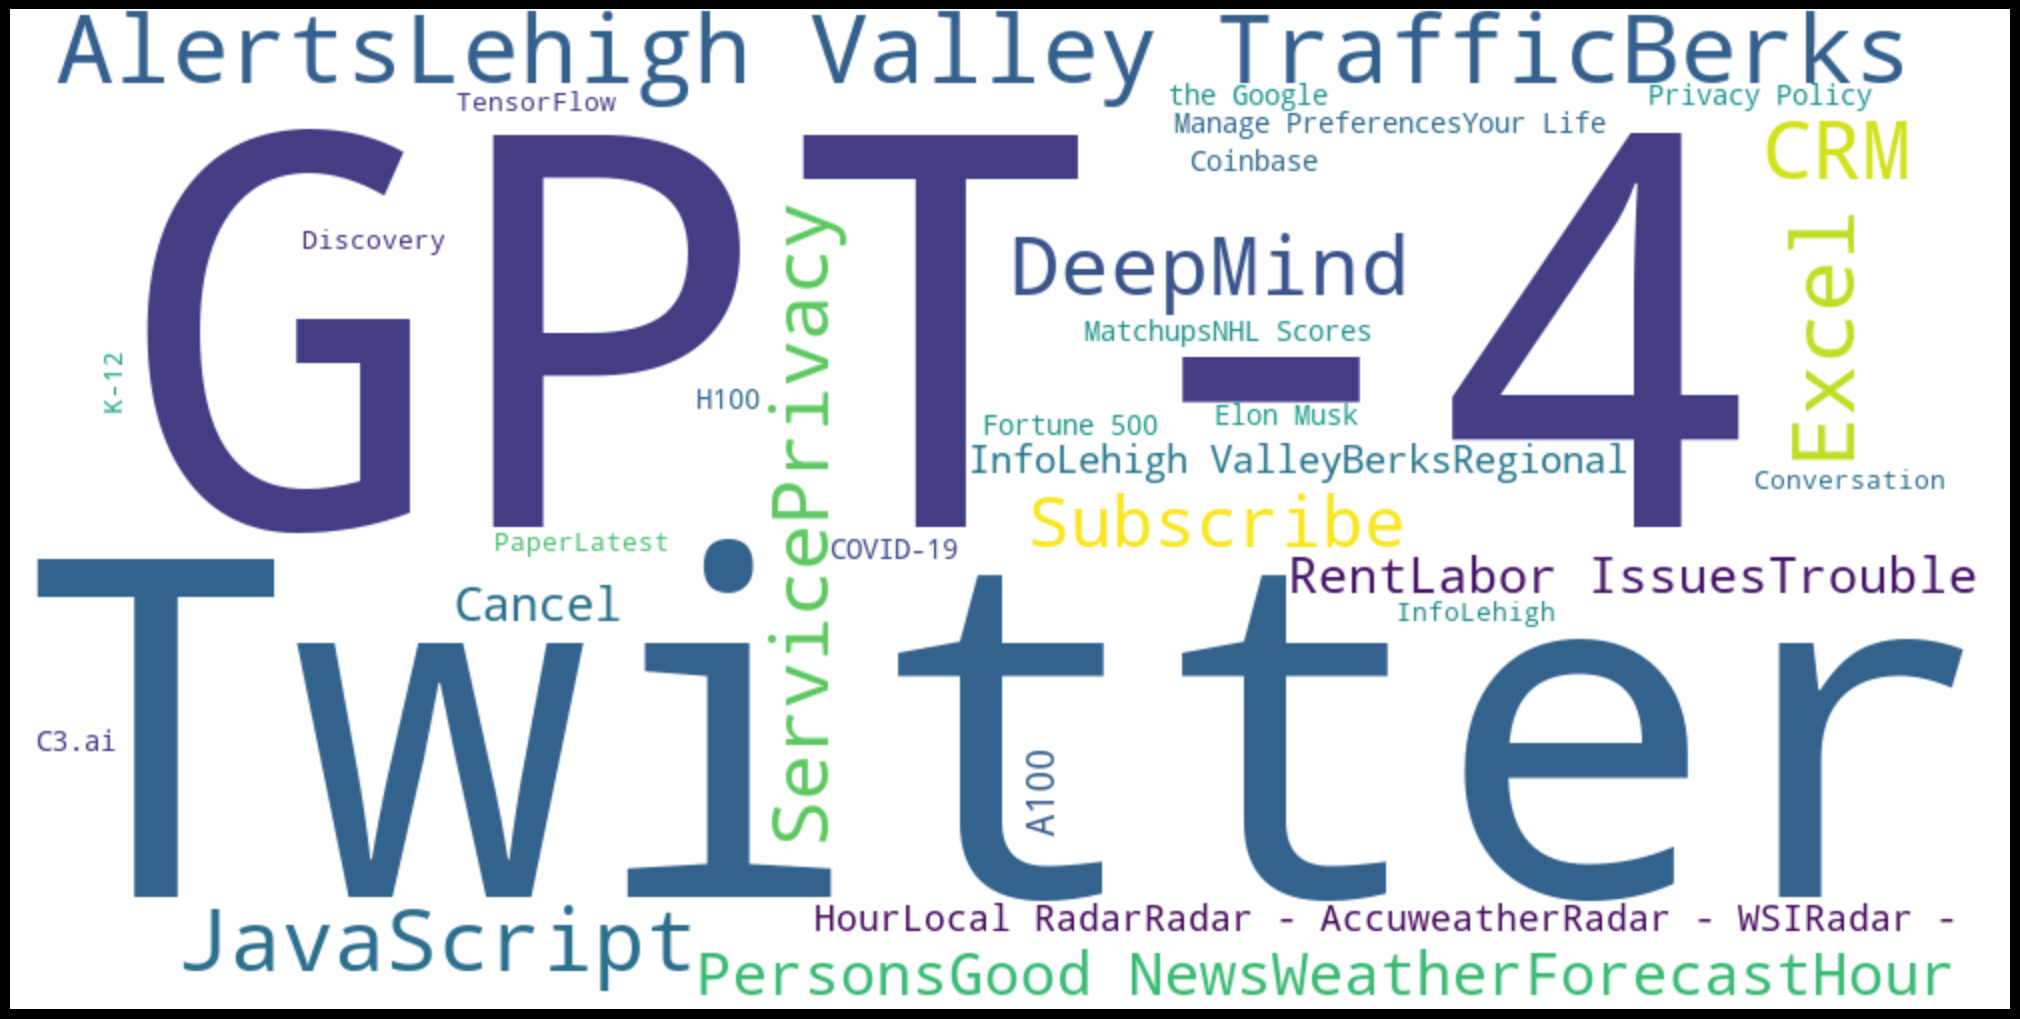

In [19]:
wordcloud_plt(neg_prod_counts)

In [20]:
# Dictionary mapping for combining entities
loc_combine_mapping = {
    'the United States': 'US',
    'United States': 'US',
    'U.S.': 'US',
    'Us': 'US' 
}

# Function to combine entities
def loc_combine_entities(entity):
    for key, value in loc_combine_mapping.items():
        if key.lower() in entity.lower():
            return value
    return entity

In [21]:
%%time
# Apply the function to the 'entities' column
neg_ner_df['entities'] = neg_ner_df['entities'].apply(loc_combine_entities)

CPU times: total: 2.44 s
Wall time: 5.92 s


In [22]:
neg_loc_df = neg_ner_df[neg_ner_df['labels'] == 'GPE']
neg_loc_df

,entities,labels
8,US,GPE
10,Texas,GPE
13,US,GPE
14,Mexico,GPE
45,America,GPE
...,...,...
9401424,Maryland,GPE
9401451,Oklahoma,GPE
9401483,AI,GPE
9401488,US,GPE


In [23]:
neg_loc_counts = neg_loc_df.groupby(['entities','labels'])['entities'].count().reset_index(name='counts')

In [24]:
neg_loc_counts.sort_values(['counts'] , ascending=False).head(20)

,entities,labels,counts
39070,US,GPE,141370
7605,China,GPE,29085
16617,India,GPE,28418
38950,UK,GPE,15314
26072,New York,GPE,9673
6664,California,GPE,9413
6753,Canada,GPE,9206
39238,Ukraine,GPE,7742
1076,AI,GPE,7150
32973,San Francisco,GPE,6979


### Top Location entities

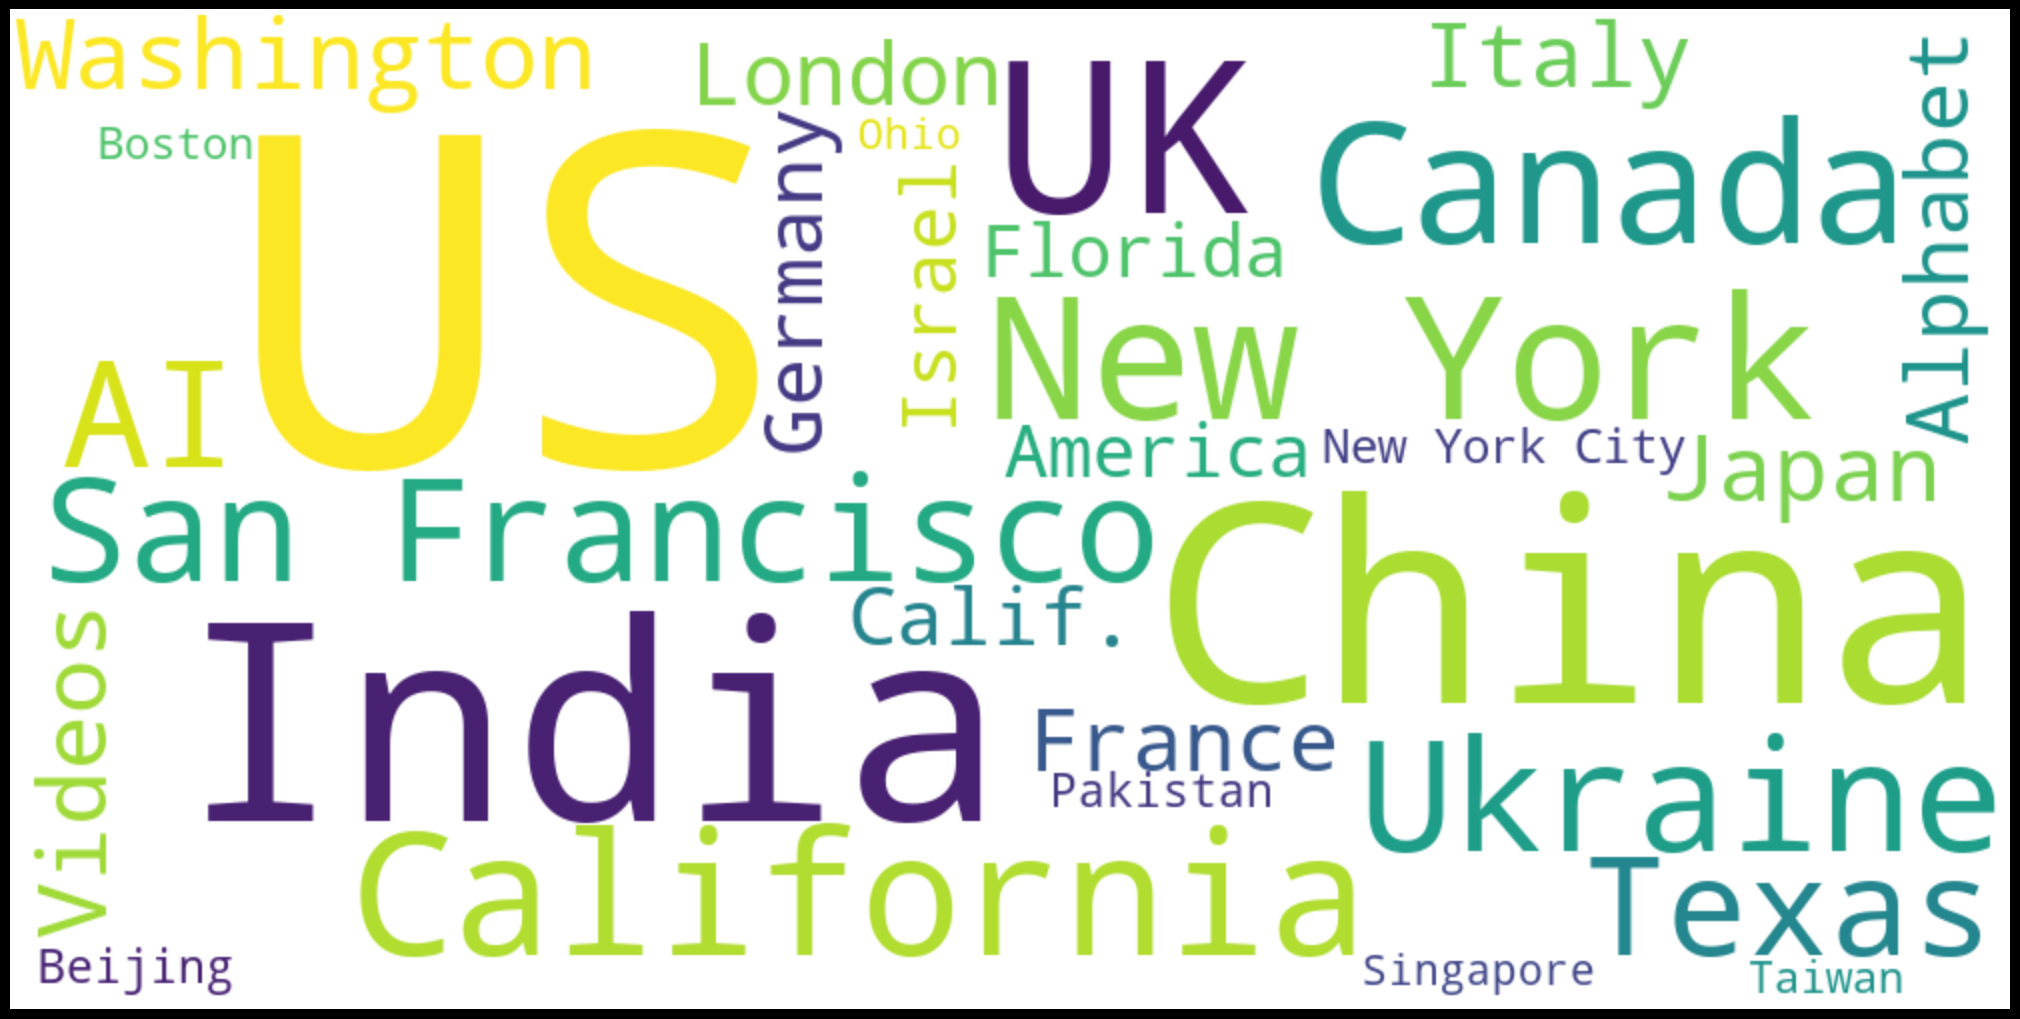

In [25]:
wordcloud_plt(neg_loc_counts)

In [1]:
import os
import re
import pandas as pd
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

from bertopic import BERTopic

pd.set_option('display.max_colwidth', 500)

2023-05-26 00:33:03.165179: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 00:33:03.225513: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 00:33:03.227438: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-26 00:33:04.332943: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
path_lda = '/home/jupyter/data/lda'

if not os.path.isdir(path_lda): os.mkdir(path_lda)

In [3]:
# Load model
saved_model = BERTopic.load(path_lda +'/neg_model')

In [4]:
freq = saved_model.get_topic_info()

print(f"Topics found: {freq.shape[0]}")
freq.head(11)

Topics found: 134


,Topic,Count,Name
0,-1,32879,-1_ai_new_data_news
1,0,2382,0_releasesign_releasesign uplog_uplog_products
2,1,1556,1_gray_gray media_media group_ai
3,2,1315,2_days_ai_new_day
4,3,1279,3_public_radio_npr_air
5,4,1016,4_mint_india_share_ai
6,5,962,5_chatgpt_openai_gpt4_chatbot
7,6,867,6_venturebeat_us_twitterfollow us_us twitterfollow
8,7,841,7_ai_data_business_learning
9,8,840,8_microsoft_ago_hours ago_bing


In [89]:
similar_topics, similarity = saved_model.find_topics("AlertsLehigh Valley TrafficBerks", top_n=1); similar_topics

[13]

In [56]:
saved_model.get_topic(13)

[('valley', 0.012069770504058053),
 ('lehigh', 0.011404770909769702),
 ('lehigh valley', 0.010594603901415717),
 ('allentown', 0.009605920003458671),
 ('schedulewdpntv', 0.009538333163538974),
 ('berks', 0.008740183928257149),
 ('scores', 0.008346442947790973),
 ('weather', 0.008285341878417203),
 ('pa', 0.008205785657201531),
 ('dashboard', 0.007863747028352415)]

In [90]:
similar_topics, similarity = saved_model.find_topics("ServicePrivacy", top_n=1); similar_topics

[83]

In [88]:
saved_model.get_topic(83)

[('customer', 0.036607856549427595),
 ('experience', 0.02614195909234051),
 ('customer experience', 0.018960016880654792),
 ('cmswire', 0.016382240496000004),
 ('cx', 0.01160532404927114),
 ('experience digital', 0.009568435789162567),
 ('marketing', 0.008914262241784739),
 ('digital', 0.008713863332097258),
 ('customer service', 0.007414982619945208),
 ('digital experience', 0.007296139870748313)]

In [97]:
similar_topics, similarity = saved_model.find_topics("RentLabor IssuesTrouble", top_n=1); similar_topics

[54]

In [98]:
saved_model.get_topic(54)

[('brandvoice', 0.028431558543502936),
 ('brandvoice paid', 0.02837264355284188),
 ('paid', 0.027712868901218365),
 ('forbes', 0.015845626315504867),
 ('credit', 0.014287437274806738),
 ('credit cardsbest', 0.013765443524835382),
 ('cardsbest', 0.013525719041818323),
 ('vaidio', 0.013434527968933867),
 ('skyrunner', 0.012005335696662992),
 ('invisio', 0.0068997673464637355)]

In [93]:
similar_topics, similarity = saved_model.find_topics("covid", top_n=1); similar_topics

[14]

In [94]:
saved_model.get_topic(14)

[('covid19', 0.012691462397985331),
 ('coronavirus', 0.010030308586096853),
 ('virus', 0.006123664083278548),
 ('health', 0.0055989986167465184),
 ('patients', 0.005094063831345591),
 ('disease', 0.004648877432483348),
 ('2020', 0.004557247049330325),
 ('pandemic', 0.0043070987404858355),
 ('researchers', 0.004119541584577325),
 ('data', 0.003809796561342882)]

In [95]:
similar_topics, similarity = saved_model.find_topics("Manage PreferencesYour Life", top_n=1); similar_topics

[96]

In [96]:
saved_model.get_topic(96)

[('suicide', 0.03301401414265711),
 ('safetylit', 0.021318918199081036),
 ('suicidal', 0.018530132326353237),
 ('risk', 0.015084367294549149),
 ('bulletin', 0.013324937106998901),
 ('machine', 0.012095485059229789),
 ('machine learning', 0.011392463035325455),
 ('learning', 0.010832053432951115),
 ('ideation', 0.009978600729559845),
 ('suicide risk', 0.009569885156766308)]

In [99]:
similar_topics, similarity = saved_model.find_topics("FacebookShare", top_n=1); similar_topics

[1]

In [100]:
saved_model.get_topic(1)

[('gray', 0.008836640214576355),
 ('gray media', 0.007229502434570874),
 ('media group', 0.007180158242820662),
 ('ai', 0.006567044711107186),
 ('group', 0.006510292079269709),
 ('media', 0.005772166319998502),
 ('platform', 0.005370043461898662),
 ('prnewswire', 0.005163828735813234),
 ('press release', 0.005119449103428384),
 ('press', 0.004801279113693547)]

In [101]:
similar_topics, similarity = saved_model.find_topics("EU", top_n=1); similar_topics

[17]

In [102]:
saved_model.get_topic(17)

[('eu', 0.013317926899346633),
 ('european', 0.011396534641423707),
 ('ai', 0.00817043507039148),
 ('regulation', 0.0068018029345358446),
 ('law', 0.006652700859513114),
 ('commission', 0.006045714987298658),
 ('systems', 0.0052479023670853765),
 ('rules', 0.0049328896914145005),
 ('rights', 0.004320512297376335),
 ('ai systems', 0.004291276899910126)]

In [106]:
similar_topics, similarity = saved_model.find_topics("AP", top_n=1); similar_topics

[70]

In [107]:
saved_model.get_topic(70)

[('oil', 0.01013435625012167),
 ('athletes', 0.008524568372213338),
 ('oil gas', 0.00846635741522236),
 ('2020', 0.007089394002705083),
 ('antidoping', 0.006865719260039488),
 ('gas', 0.006702233526641008),
 ('wada', 0.006626090427117624),
 ('ap', 0.006416478394199456),
 ('photo', 0.00587624225874943),
 ('coronavirus', 0.00562700840853265)]

In [108]:
similar_topics, similarity = saved_model.find_topics("CRM", top_n=1); similar_topics

[120]

In [109]:
saved_model.get_topic(120)

[('globaldata', 0.018876171307269544),
 ('hiring', 0.016680980751216407),
 ('journalism team', 0.01248379167150774),
 ('data journalism', 0.012327282209141158),
 ('industry', 0.011760965779049361),
 ('payments', 0.009790740941461115),
 ('companies', 0.009640995914406434),
 ('sustainabilityinternet', 0.009324798910426733),
 ('analysis', 0.009227276236745604),
 ('journalism', 0.009186866136909971)]

In [113]:
similar_topics, similarity = saved_model.find_topics("NYSE", top_n=1); similar_topics

[28]

In [114]:
saved_model.get_topic(28)

[('finance', 0.012120692939002678),
 ('yahoo', 0.00874581928758457),
 ('stocks', 0.008138515929827369),
 ('screener', 0.007378735413700461),
 ('yahoo finance', 0.006728193815774535),
 ('market', 0.006585574093048205),
 ('stock', 0.006576597356765364),
 ('markets', 0.006496726986550797),
 ('us', 0.004740870708486238),
 ('highest', 0.0045392670676800955)]

In [1]:
import pandas as pd
neg_df = pd.read_parquet('neg_topics.parquet')

In [2]:
topic_numbers = [13, 83, 54, 14, 96, 1, 120, 28, 70, 17]
filtered_df = neg_df[neg_df['Topic Number'].isin(topic_numbers)]

In [3]:
#Converting date column to datetime format and extracting relevant information
filtered_df["date"] = pd.to_datetime(filtered_df["date"])
filtered_df["year"] = filtered_df["date"].dt.year
filtered_df["month"] = filtered_df["date"].dt.month
filtered_df["day"] = filtered_df["date"].dt.day
filtered_df["dayofweek"] = filtered_df["date"].dt.dayofweek

C:\Users\prana\AppData\Local\Temp\ipykernel_10468\3281772687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["date"] = pd.to_datetime(filtered_df["date"])
C:\Users\prana\AppData\Local\Temp\ipykernel_10468\3281772687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = filtered_df["date"].dt.year
C:\Users\prana\AppData\Local\Temp\ipykernel_10468\3281772687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [4]:
neg_topic_counts = filtered_df.groupby(['Topic Number','year'])['Topic Number'].count().reset_index(name='Counts')

In [5]:
# Assuming your DataFrame is named 'df' and the column with topic numbers is named 'topic_number'
topic_mapping = {
    13: 'AlertsLehigh Valley TrafficBerks',
    83: 'ServicePrivacy',
    54: 'RentLabor IssuesTrouble',
    14: 'COVID-19',
    96: 'Manage PreferencesYour Life',
    1: 'Facebook Share',
    120: 'CRM',
    28: 'NYSE',
    70: 'AP',
    17: 'EU'
}

neg_topic_counts['Topic'] = neg_topic_counts['Topic Number'].map(topic_mapping)

In [6]:
neg_topic_counts

,Topic Number,year,Counts,Topic
0,1,2020,47,Facebook Share
1,1,2021,155,Facebook Share
2,1,2022,807,Facebook Share
3,1,2023,547,Facebook Share
4,13,2020,231,AlertsLehigh Valley TrafficBerks
5,13,2021,389,AlertsLehigh Valley TrafficBerks
6,13,2022,35,AlertsLehigh Valley TrafficBerks
7,14,2020,378,COVID-19
8,14,2021,117,COVID-19
9,14,2022,48,COVID-19


### Plotting Current Failures of AI by Document Count

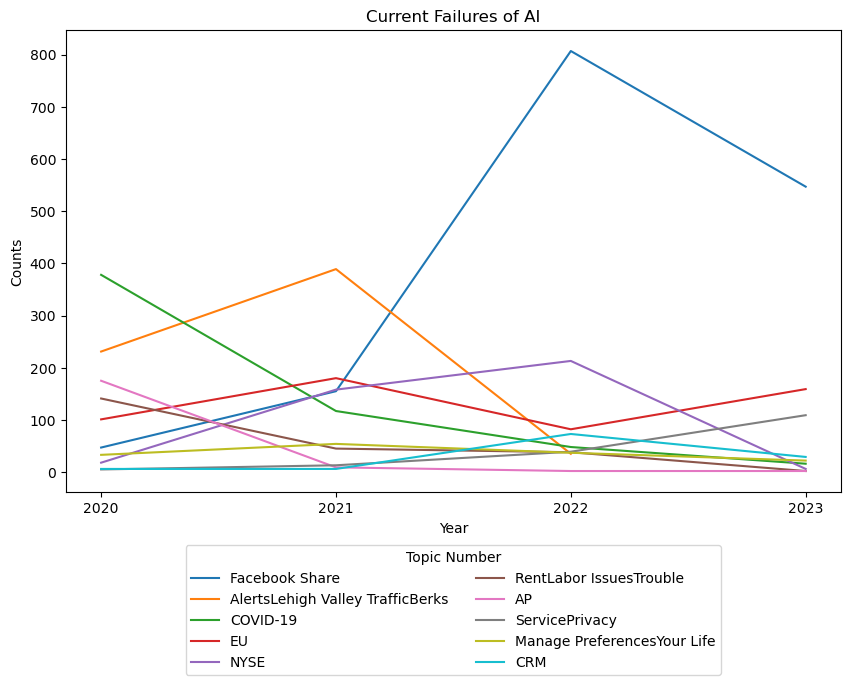

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Counts', hue='Topic', data=neg_topic_counts, palette='tab10')
plt.legend(loc='upper center',title='Topic Number', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.xticks(neg_topic_counts['year'].unique())
plt.xlabel('Year')
plt.title('Current Failures of AI')
plt.show()

In [8]:
neg_topic_sent = filtered_df.groupby(['Topic Number','year'])['Negative Probability'].mean().reset_index(name='Negative Probability')

In [9]:
neg_topic_sent['Topic'] = neg_topic_sent['Topic Number'].map(topic_mapping)

### Plotting Current Failures of AI by Sentiment

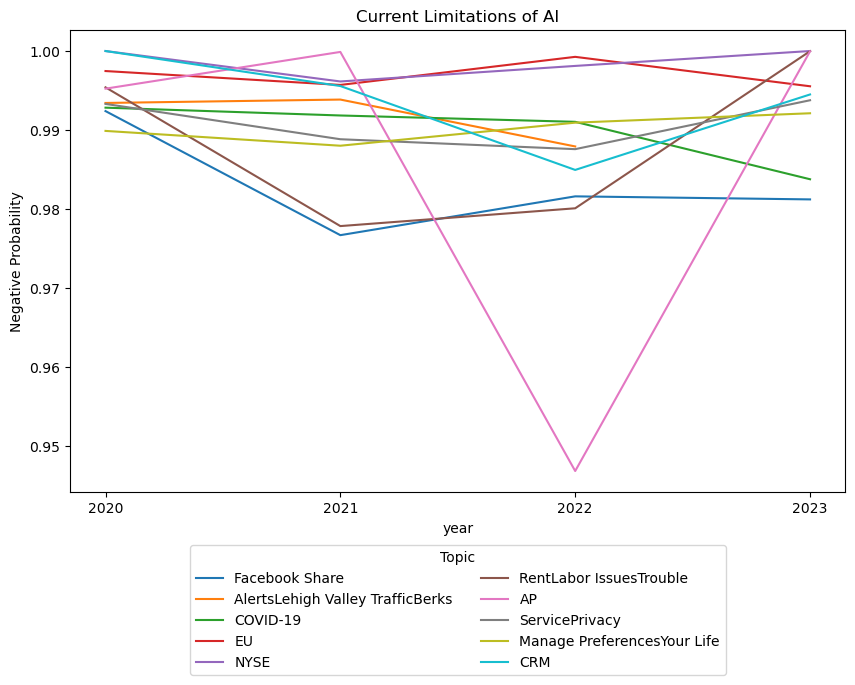

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Negative Probability', hue='Topic', data=neg_topic_sent, palette='tab10')
plt.legend(loc='upper center',title='Topic', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.xticks(neg_topic_sent['year'].unique())
plt.title('Current Limitations of AI')
plt.show()